# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
What test is appropriate for this problem? 

We have two samples: white called back and black called back. We can perform two sample data test with null hypothesis that the black and white come from the same popultation, that is, the race does not matter.

Does CLT apply? (https://stattrek.com/statistics/dictionary.aspx?definition=central_limit_theorem)
The sample we have is large enough. The call back is a random event. We can apply CLT, because the requirements for CLT are met. The ratio of call/no call is a proportion, and thus, we have a Bernoulli distribution.


What are the null and alternate hypotheses?
The null hypothesis is that the proportion for call back for black and call back for white are equal. 
The alternative hypothesis is the proportion for call back for black and the proportion for call back for white are different.

We will calculate $z_{\alpha}$ value of the observed proportion under the null hypothesis. If this value is above the treshhold, we can conclude that the null hypothesis is true. If the z value is below, we can safely reject the null hypothesis.

In [7]:
# Your solution to Q3 here

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
pd.options.display.latex.repr=True

In [10]:
w = data[data.race=='w']
b = data[data.race=='b']
#alpha
b_ratio = b.call.sum()/b.call.count()
w_ratio = w.call.sum()/w.call.count()
print('percent black called back is ', b_ratio)
print('percent white called back is ', w_ratio)
all_ratio = data.call.sum()/data.call.count()
print('percent people called back is ', all_ratio)

percent black called back is  0.06447638603696099
percent white called back is  0.09650924024640657
percent people called back is  0.08049281314168377


In [11]:
# confidence interval
# variances
b_var = np.var(b.call)
w_var = np.var(w.call)

# number in sets for formula
n_b = b.call.count()
n_w = w.call.count()

# z_alpha value from z-value table conf = 99%
Z_ALPHA = 2.575

low_bound = (b_ratio - w_ratio) - Z_ALPHA*(b_var/n_b +w_var/n_w)**0.5
high_bound = (b_ratio - w_ratio) + Z_ALPHA*(b_var/n_b +w_var/n_w)**0.5

print('The 99% CIE is from ', low_bound, ' to ', high_bound)

The 99% CIE is from  -0.052075033688641276  to  -0.011990674730249895


In [12]:
# z value test
z_value = (b_ratio -w_ratio)/(all_ratio*(1-all_ratio)*(1/n_b + 1/n_w))**0.5
print('The z-value under null hypothesis is ', z_value)

The z-value under null hypothesis is  -4.108412152434346


The p-value associated with the above z-value is approximately 0. This means, that the race is a factor in the call back.

In [13]:
# error
st_dev_diff = (b_var / n_b + w_var / n_w) ** (0.5)

# we use the opposite of Z_ALPHA, because we set it to negative value
err_calc = Z_ALPHA * st_dev_diff /(n_b + n_w) ** 0.5
print('The calculated error is ', err_calc)

The calculated error is  0.0002871973751532675


In [14]:
# bootstrap method
# functions we need - 1)data_perm
def data_perm(data1, data2):
    '''Returns permutation of data1 and data2'''
    #concatenate data:
    data = np.concatenate((data1, data2))
    
    #permuting data
    data_perm = np.random.permutation(data)
    
    #splitting the data
    data_perm1 = data_perm[:len(data1)]
    data_perm2 = data_perm[len(data1):]
    
    #return
    return data_perm1, data_perm2

#
def draw_prm_replicates(data1, data2, func, size=1):
    '''Generates multiple permutation replicates of 
    statistic func using data1, data2 and data_perm func inside.'''
    
    # initialize array of replicates
    prm_replicates = np.empty(size)
    
    for i in range(size):
        #generate sample
        prm_sample1, prm_sample2 = data_perm(data1, data2)
        
        # compute test statistics of two data sets
        prm_replicates[i] = func(prm_sample1, prm_sample2)
        
    return prm_replicates


# difference of means function
def diff_means(data1, data2):
    '''Returns difference of means of two datasets.'''
    return np.mean(data1) - np.mean(data2)

In [15]:
# bootstrap calculation
emp_mean = diff_means(b['call'], w['call'])

# 100000 simulated values of diff of means
sim_means = draw_prm_replicates(b['call'], w['call'], diff_means, 100000)

# calculate p value all sim_means that are greater than emp_mean
p_value = np.sum(sim_means <= emp_mean) / len(sim_means)

# printing the value
print('p-value is ', p_value)

p-value is  0.0


In [16]:
#simulating confidence interval at 99%.
cie_low = np.percentile(sim_means, [0.5])
cie_high = np.percentile(sim_means, [99.5])

#printing the interval
print('CIE margins are for simulated data difference, given the null hypothesis are', cie_low, ' and ', cie_high)
print('difference of means calculated using data is ', emp_mean)

CIE margins are for simulated data difference, given the null hypothesis are [-0.01971253]  and  [0.01971253]
difference of means calculated using data is  -0.032032855


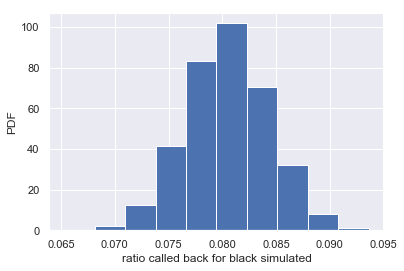

In [17]:
# simulate blacks data under null hypothesis and compare to the empirical value b_ratio

# initialize array to calculate simulated sets
sim_ratio = np.empty(10000)

# calculate ratio of call/nocall for the simulated data:
for i in range(10000):
    sim_b, _ = data_perm(b['call'], w['call'])
    sim_ratio[i] = sim_b.sum()/len(sim_b)
#
plt.hist(sim_ratio, density=True)
plt.xlabel('ratio called back for black simulated')
plt.ylabel('PDF')
plt.show()

Does your analysis mean that race/name is the most important factor in callback success? Wh0y or why not? If not, how would you amend your analysis?

The analysis of the name-call shows clearly that the name matters. Is it the most important factor in call back? 
This question was not part of the analysis above. What we need to do to investigate, is to compare correlation coefficient name-call and compare it to all other correlation coefficient. Just then, we can make sure about the importance of the name in the process of calling back a person.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

percent black called back is  0.06447638603696099
percent white called back is  0.09650924024640657
percent people called back is  0.08049281314168377


Write a story describing the statistical significance in the context or the original problem.

Your name is part of you. My name is part of me. How the names are related to I am called back for a job interview? 
If you do not know my name, my chance to be called for an interview is about 8%.
If my name sounds black, my chance to be called for an interview is about 6.4%
If my name sounds white, my chance bumpes up to 9.7%!
Quite of story, isn't it?

The name matters. We checked the hypothesis that the proportion of people called is not correlated with the name of the person. We set $ \alpha = 0.01$ and run the appropriate tests. We used two different methods: we calculate the probability to have that large of a difference, about 3.3% under the null hypothesis. The z - value turn to be more than 5. We used one of the largest value for null hypothesis = 99% CI, and still, the observed value was far away from the interval.

When we used simulation, the simulated interval for the difference of means is from -0.02 to +0.02. The observed value for the difference of mean was -0.033! The observed value does not belong to the interval.

Lastly, we simulated the mean ratio under the null hypothesis the proportion for blacks and white call back are equal, and plot it. The observed value for call back of 0.064 is not even on the shown part of the number line! The simulated interval for possible values for proportion is between 0.068 and 0.094, and the value we calculated is too far from that interval.

Both methods, calculating p-value and simulating show that the proprtion for people called for interview depends on the name of the person. The null hypothesis that the proportion of people called is the same for blacks and whites, is rejected.

